# Homework 4 (Dev Mody)
## Exercise 3 (Autoencoder)

The following code clones the directories necessary for this exercise:
```python
# install github clone - allows for easy cloning of subdirectories
!pip install github-clone
from pathlib import Path 

# clone datasets
if not Path('chapter_8_datasets').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_datasets
else:
    print('chapter_8_datasets already cloned!')

# clone library subdirectory
if not Path('chapter_8_library').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_library
else:
    print('chapter_8_library already cloned!')

# clone images
if not Path('chapter_8_images').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_images
else:
    print('chapter_8_images already cloned!')

# clone videos
if not Path('chapter_8_videos').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_videos
else:
    print('chapter_8_videos already cloned!')

## run universally whether in collab or local ##
# append path for local library, data, and image import
import sys
sys.path.append('./chapter_8_library') 
sys.path.append('./chapter_8_images') 
sys.path.append('./chapter_8_datasets') 

# import section helper
import section_8_3_helpers

# dataset paths
dataset_path_1 = 'chapter_8_datasets/2d_span_data.csv'
dataset_path_2 = 'chapter_8_datasets/3d_span_data.csv'

# image paths
image_path_1 = "chapter_8_images/pca_classic.png"
image_path_2 = "chapter_8_images/Fig_9_7.png"

# standard imports
import matplotlib.pyplot as plt
from IPython.display import Image
import autograd.numpy as np
from matplotlib import gridspec

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2
```

The `least_squares` function is defined as follows:
```python
# here the weight matrices are loaded in a single list w = [C,W]
def least_squares(w):  
    # strip off C and W parameters
    C = w[0]
    W = w[1]
    
    # compute the least squares cost
    cost = np.sum((np.dot(C,W) - X)**2)
    return cost/float(X.shape[1])
```

The `least_squares` function is then used to define the `autoencoder` function as follows:
```python
# load in dataset
X_original = np.loadtxt(dataset_path_2,delimiter=',')

# center data
X_means = np.mean(X_original,axis=1)[:,np.newaxis]
X = X_original - X_means

# run gradient descent to minimize the Least Squares cost for linear regression
g = least_squares
max_its = 100
alpha_choice = 10**(0)

# set up initialization
scale = 0.1
C = scale*np.random.randn(3,2)
W = scale*np.random.randn(2,100)
w = [C,W]

# run gradient descent
weight_history,cost_history = section_8_3_helpers.gradient_descent(g,alpha_choice,max_its,w)
```

Then the visualization for this is as follows:
```python
# produce visuals
C = weight_history[-1][0]
view = [15,105]
section_8_3_helpers.project_data_from_3d_to_2d(X,C,view)
```

The task is to modify the above code so that instead of determining both `C` and `W`, it implements a PROPER autoencoder by only determining the optimal `C` as seen in the cost function $g(C) = \frac{1}{P}\sum_{p=1}^{P}||CC^Tx_p - x_p||_2^2$ in the textbook

ANSWER: The implementation requires us to make the spanning vectors of $C$ orthonormal so that we can express the encoding of $x_p$ as $w_p = C^Tx_p$

In [1]:
# install github clone - allows for easy cloning of subdirectories
!pip install github-clone
from pathlib import Path 

# clone datasets
if not Path('chapter_8_datasets').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_datasets
else:
    print('chapter_8_datasets already cloned!')

# clone library subdirectory
if not Path('chapter_8_library').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_library
else:
    print('chapter_8_library already cloned!')

# clone images
if not Path('chapter_8_images').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_images
else:
    print('chapter_8_images already cloned!')

# clone videos
if not Path('chapter_8_videos').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_videos
else:
    print('chapter_8_videos already cloned!')

## run universally whether in collab or local ##
# append path for local library, data, and image import
import sys
sys.path.append('./chapter_8_library') 
sys.path.append('./chapter_8_images') 
sys.path.append('./chapter_8_datasets') 

# import section helper
import section_8_3_helpers

# dataset paths
dataset_path_1 = 'chapter_8_datasets/2d_span_data.csv'
dataset_path_2 = 'chapter_8_datasets/3d_span_data.csv'

# image paths
image_path_1 = "chapter_8_images/pca_classic.png"
image_path_2 = "chapter_8_images/Fig_9_7.png"

# standard imports
import matplotlib.pyplot as plt
from IPython.display import Image
import autograd.numpy as np
from matplotlib import gridspec

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

chapter_8_datasets already cloned!
chapter_8_library already cloned!
chapter_8_images already cloned!
chapter_8_videos already cloned!


Final cost: 0.9308986135242071


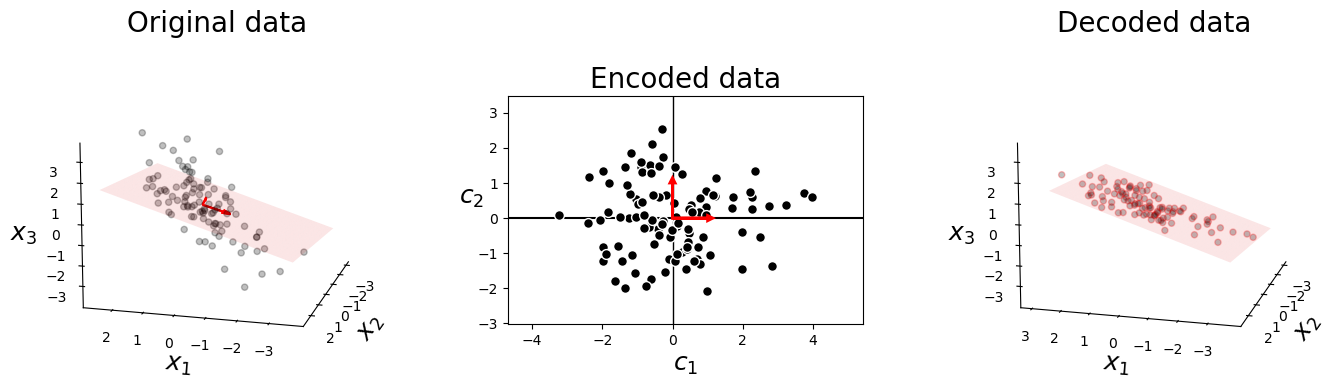

In [16]:
# Import autograd's gradient function
from autograd import grad
import numpy as np

# Define the cost function with shape checking
def autoencoder_cost(C):
    reconstructed = np.dot(C, np.dot(C.T, X))  # (3, 2) @ (2, 50) -> (3, 50)
    cost = np.sum((reconstructed - X)**2)
    return cost / float(X.shape[1])

# Gradient descent with orthonormality
def gradient_descent_with_orthonormality(g, alpha, max_its, C_init):
    weight_history = [C_init]
    cost_history = [g(C_init)]
    C = C_init
    gradient = grad(g)
    
    for _ in range(max_its):
        grad_C = gradient(C)
        C_new = C - alpha * grad_C
        Q, R = np.linalg.qr(C_new)  # Q will be same shape as C_new (3, 2)
        C = Q
        cost = g(C)
        weight_history.append(C)
        cost_history.append(cost)
    
    return weight_history, cost_history

# Load and prepare data
dataset_path_2 = 'chapter_8_datasets/3d_span_data.csv'
X_original = np.loadtxt(dataset_path_2, delimiter=',')
X_means = np.mean(X_original, axis=1)[:, np.newaxis]
X = X_original - X_means  

# Set up initialization
scale = 0.1
C_init = scale * np.random.randn(3, 2) 
Q, R = np.linalg.qr(C_init)
C_init = Q

# Run gradient descent
g = autoencoder_cost
max_its = 100
alpha_choice = 10**0
weight_history, cost_history = gradient_descent_with_orthonormality(g, alpha_choice, max_its, C_init)

# Visualization
C_optimal = weight_history[-1]  
view = [15, 105]
section_8_3_helpers.project_data_from_3d_to_2d(X, C_optimal, view)

# Print final cost
print(f"Final cost: {cost_history[-1]}")